In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
pd.set_option('display.max_columns', None)
%matplotlib inline

In [52]:
pitches_df = pd.read_csv('../data/pitches.csv', low_memory=False)

In [53]:
#how many balls, strikes, and in plays are there?
pitches_df.groupby('type').count()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,code,pitch_type,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,1035529,1035529,1035556,1035556,1035529,1035529,1035529,1035529,1035529,1035529,1035529,1035529,1044366,1044366,1035529,1035529,1035529,1035529,1045126,1035529,1045126,1035529,1035529,1035544,1035544,1035529,1035529,1043118,1035529,1045126,1045126,1045126,1045126,1045126,1045126,1045126,1045126,1045126,1045126
S,1305577,1305577,1305610,1305610,1305577,1305577,1305577,1305577,1305577,1305577,1305577,1305577,1307912,1307912,1305577,1305577,1305577,1305577,1308865,1305577,1308865,1305577,1305577,1305598,1305598,1305577,1305577,1306152,1305577,1308865,1308865,1308865,1308865,1308865,1308865,1308865,1308865,1308865,1308865
X,511859,511859,511874,511874,511859,511859,511859,511859,511859,511859,511859,511859,512793,512793,511859,511859,511859,511859,513163,511859,513163,511859,511859,511870,511870,511859,511859,512165,511859,513163,513163,513163,513163,513163,513163,513163,513163,513163,513163


Text(0.5, 1.0, 'Count of Balls, Strikes, and In Play')

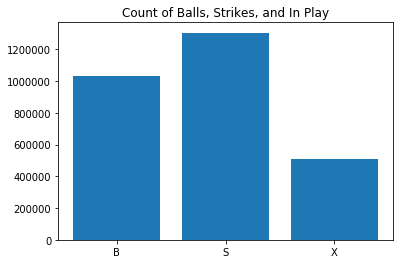

In [54]:
plt.bar(pitches_df.groupby('type').count().index, pitches_df.groupby('type').count().iloc[:, 0])
plt.title('Count of Balls, Strikes, and In Play')

In [55]:
balls = np.where(pitches_df['type'] == 'B')[0]
strikes = np.where(pitches_df['type'] == 'S')[0]
hits = np.where(pitches_df['type'] == 'X')[0]

In [56]:
random_balls = random.choices(balls, k=50000)
random_strikes = random.choices(strikes, k=50000)
random_hits = random.choices(hits, k=50000)

In [57]:
indicies = np.append([random_balls, random_strikes], random_hits)

In [58]:
subsampled_types = pitches_df.iloc[indicies, :]

In [59]:
unknowns = np.where(subsampled_types.isna().any(axis=1) == True)[0]

In [61]:
subsampled_types.reset_index().drop(index = unknowns, inplace=True)

In [62]:
subsampled_types.reset_index(inplace=True)

In [82]:
outcomes = subsampled_types['type']

(-2, 2)

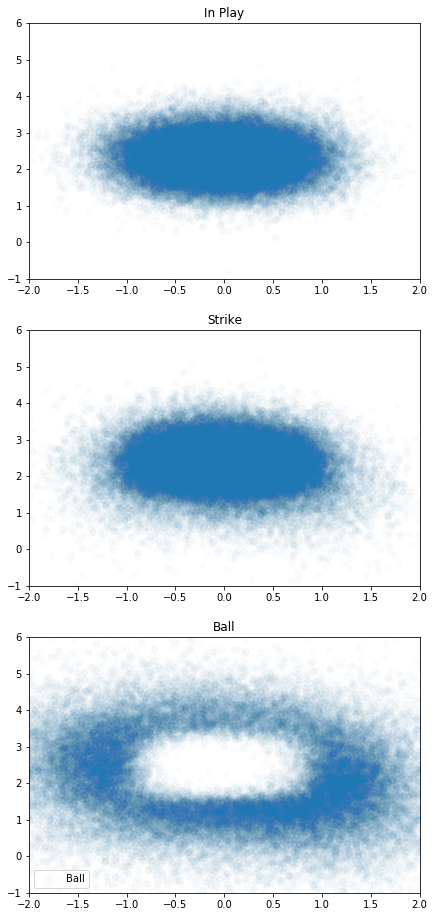

In [102]:
fig, ax = plt.subplots(3, 1, figsize=(7, 16))

ax[0].scatter(subsampled_types['px'][subsampled_types['type'] == 'X'], subsampled_types['pz'][subsampled_types['type'] == 'X'], label='In Play', alpha=0.02)
ax[0].set_title('In Play')
ax[0].set_ylim(-1, 6)
ax[0].set_xlim(-2, 2)
ax[1].scatter(subsampled_types['px'][subsampled_types['type'] == 'S'], subsampled_types['pz'][subsampled_types['type'] == 'S'], label='Strike', alpha=0.02)
ax[1].set_title('Strike')
ax[1].set_xlim(-2, 2)
ax[1].set_ylim(-1, 6)
ax[2].scatter(subsampled_types['px'][subsampled_types['type'] == 'B'], subsampled_types['pz'][subsampled_types['type'] == 'B'], label='Ball', alpha=0.02)
ax[2].set_title('Ball')
ax[2].set_ylim(-1, 6)
plt.legend(loc='lower left')
plt.xlim(-2, 2)